![oops couldn't find image](Data-Science-Essentials-2020-header.png)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import geopandas as gpd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from cm import plot_confusion_matrix

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

***
# Section 1 - Heart attack data

### Create a DataFrame, ha_costs_df, from the mmd_heart_attack_data.csv file.

In [2]:
ha_costs_df = pd.read_csv('../data/mmd_heart_attack_data.csv')

Examine the first 5 rows of the TN heart attack data.

In [3]:
ha_costs_df.head(-1)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,40470
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,36615
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,46509
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,42949
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,50067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72061,Guaynabo Municipio,PUERTO RICO,Urban,All,undefined,25049
2651,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72097,Mayaguez Municipio,PUERTO RICO,Urban,All,undefined,28128
2652,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72113,Ponce Municipio,PUERTO RICO,Urban,All,undefined,26403
2653,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72125,San German Municipio,PUERTO RICO,Urban,All,undefined,26398


Now examine the last five rows.

In [4]:
ha_costs_df.tail(5)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2651,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72097,Mayaguez Municipio,PUERTO RICO,Urban,All,undefined,28128
2652,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72113,Ponce Municipio,PUERTO RICO,Urban,All,undefined,26403
2653,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72125,San German Municipio,PUERTO RICO,Urban,All,undefined,26398
2654,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72127,San Juan Municipio,PUERTO RICO,Urban,All,undefined,36599
2655,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72139,Trujillo Alto Municipio,PUERTO RICO,Urban,All,undefined,26676


Check the data types of each column by using .info.

In [5]:
ha_costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 2656 non-null   int64 
 1   geography            2656 non-null   object
 2   measure              2656 non-null   object
 3   adjustment           2656 non-null   object
 4   analysis             2656 non-null   object
 5   domain               2656 non-null   object
 6   condition            2656 non-null   object
 7   primary_sex          2656 non-null   object
 8   primary_age          2656 non-null   object
 9   primary_dual         2656 non-null   object
 10  fips                 2656 non-null   int64 
 11  county               2656 non-null   object
 12  state                2656 non-null   object
 13  urban                2656 non-null   object
 14  primary_race         2656 non-null   object
 15  primary_denominator  2656 non-null   object
 16  analys

Keep only the rows where facilities are in TN.

In [6]:
ha_costs_df_TN = ha_costs_df.loc[ha_costs_df['state'] == 'TENNESSEE']

Print the dimensions of the resulting dataframe.

In [7]:
ha_costs_df_TN.shape

(91, 17)

How many TN counties are represented in the heart attack costs data?

In [8]:
ha_costs_df_TN['county'].nunique()

91

Check to make sure the county names look correct.

In [9]:
ha_costs_df_TN.county.value_counts()

Scott County         1
Lewis County         1
Franklin County      1
Washington County    1
Hardeman County      1
                    ..
Humphreys County     1
Lincoln County       1
Gibson County        1
Hickman County       1
Henderson County     1
Name: county, Length: 91, dtype: int64

How many counties are classified as urban? How many as rural?

In [10]:
ha_costs_df_TN.urban.value_counts()

Rural    53
Urban    38
Name: urban, dtype: int64

***
# Section 2 - Cancer data

### Create a DataFrame, cancer_costs_df, from the mmd_cancer_data.csv file.

In [11]:
cancer_costs_df = pd.read_csv('../data/mmd_cancer_data.csv')

Look at the head and tail of the DataFrame.

In [12]:
cancer_costs_df.head(-1)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,19293
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,17151
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,19469
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,17234
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,20317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72143,Vega Alta Municipio,PUERTO RICO,Urban,All,undefined,12424
3160,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72145,Vega Baja Municipio,PUERTO RICO,Urban,All,undefined,7364
3161,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72147,Vieques Municipio,PUERTO RICO,Rural,All,undefined,9987
3162,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72149,Villalba Municipio,PUERTO RICO,Urban,All,undefined,24127


Keep only the rows where facilities are in TN.

In [13]:
cancer_costs_df_TN = cancer_costs_df.loc[cancer_costs_df['state'] == 'TENNESSEE']

Print the dimensions of the data. How many TN counties are represented in the cancer costs data?

In [14]:
print(cancer_costs_df_TN.shape)
print('Unique counties =',cancer_costs_df_TN.county.nunique())

(95, 17)
Unique counties = 95


You should have found that the datasets have a different number of counties. Bonus: Can you figure out which counties are missing from one of the datasets?

In [15]:
print('Missing counties in heart attack data =',set(cancer_costs_df_TN.county).difference(set(ha_costs_df_TN.county)))

Missing counties in heart attack data = {'Pickett County', 'Moore County', 'Hancock County', 'Van Buren County'}


In [16]:
print('Missing counties in cancer data =',set(ha_costs_df_TN.county).difference(set(cancer_costs_df_TN.county)))

Missing counties in cancer data = set()


***
# Section 3 - Income data

### Create a DataFrame, income_df, from the irs_county_2016.csv file.

In [17]:
income_df = pd.read_csv('../data/irs_county_2016.csv')

Look at the head and the tail.

In [18]:
income_df.head(-1)

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,Alabama,1,26450,14680,9740,680,17780,...,4300,9256,70,57,0,0,2590,3685,11510,35079
1,1,AL,0,Alabama,2,285760,217880,25170,39740,143390,...,70050,40569,0,0,0,0,22720,11109,237630,263152
2,1,AL,0,Alabama,3,529780,259680,80320,181410,297440,...,297770,290358,0,0,0,0,41330,40647,474140,1569463
3,1,AL,0,Alabama,4,495750,211100,141800,127420,272030,...,397940,983800,40,22,0,0,73880,110840,415850,1173195
4,1,AL,0,Alabama,5,263130,82330,137610,35760,154540,...,252940,1346083,20,27,0,0,63240,140446,194790,542205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25530,56,WY,45,Weston County,3,540,320,120,90,290,...,320,330,0,0,0,0,60,66,440,1209
25531,56,WY,45,Weston County,4,610,310,210,70,380,...,540,1559,0,0,0,0,100,188,490,1377
25532,56,WY,45,Weston County,5,460,150,270,40,300,...,440,2548,0,0,0,0,90,249,360,1111
25533,56,WY,45,Weston County,6,460,90,330,40,310,...,450,4072,0,0,0,0,100,333,340,1251


First verify the unique values for state.

In [19]:
income_df.STATE.value_counts()

TX    2040
GA    1280
VA    1072
KY     968
MO     928
KS     848
IL     824
NC     808
IA     800
TN     768
NE     752
IN     744
OH     712
MN     704
MI     672
MS     664
OK     624
AR     608
WI     584
PA     544
AL     544
FL     544
SD     536
CO     520
LA     520
NY     504
CA     472
MT     456
WV     448
ND     432
SC     376
ID     360
WA     320
OR     296
NM     272
AK     240
UT     240
MD     200
WY     192
NJ     176
NV     144
ME     136
AZ     128
MA     120
VT     120
NH      88
CT      72
RI      48
HI      40
DE      32
DC      16
Name: STATE, dtype: int64

Keep only the data that pertains to Tennessee.

In [20]:
income_df_TN = income_df[income_df.STATE == 'TN']

Print the shape.

In [21]:
income_df_TN.shape

(768, 148)

Keep only the specified columns.

In [22]:
keep_cols = ['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']
income_df_TN_red = income_df_TN.loc[:,keep_cols]

Rename those columns.

In [23]:
income_df_TN_red.columns = ['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']

In [24]:
income_df_TN_red.head(-1)

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,2,439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,3,717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,4,759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,5,396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20514,TN,Wilson County,3,11330,7160,1850,2040,17420,5260,2650,194030,11330,197522,200,673
20515,TN,Wilson County,4,14400,7130,4050,2610,27040,8660,3140,526285,14400,534076,260,816
20516,TN,Wilson County,5,9330,2890,5160,960,21000,6520,2440,577200,9330,585294,160,530
20517,TN,Wilson County,6,7160,1060,5630,380,18780,6000,1910,621704,7160,629408,130,485


# Week 2

Look at the distribution of analysis values within the state of Tennessee for both `ha_costs_df` and `cancer_costs_df`. Does there appear to be a difference in these distributions for urban counties compared to rural counties?

In [25]:
ha_costs_df_TN_urban = ha_costs_df_TN.loc[ha_costs_df_TN['urban'] == 'Urban']
ha_costs_df_TN_urban.analysis_value.describe()

count       38.000000
mean     45748.921053
std       7109.788921
min      32279.000000
25%      40452.750000
50%      45496.500000
75%      50734.500000
max      61541.000000
Name: analysis_value, dtype: float64

In [26]:
ha_costs_df_TN_rural = ha_costs_df_TN.loc[ha_costs_df_TN['urban'] == 'Rural']
ha_costs_df_TN_rural.analysis_value.describe()

count       53.000000
mean     45773.075472
std       6232.724885
min      30831.000000
25%      41240.000000
50%      45384.000000
75%      48998.000000
max      62641.000000
Name: analysis_value, dtype: float64

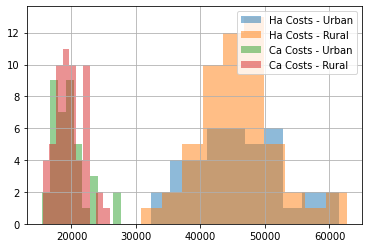

In [27]:
h = ha_costs_df_TN.analysis_value[ha_costs_df_TN.urban == 'Urban'].hist(alpha=0.5,bins=10,label='Ha Costs - Urban')
ha_costs_df_TN.analysis_value[ha_costs_df_TN.urban == 'Rural'].hist(alpha=0.5,bins=10,label='Ha Costs - Rural')
cancer_costs_df_TN.analysis_value[cancer_costs_df_TN.urban == 'Urban'].hist(alpha=0.5,bins=10,label='Ca Costs - Urban')
cancer_costs_df_TN.analysis_value[cancer_costs_df_TN.urban == 'Rural'].hist(alpha=0.5,bins=10,label='Ca Costs - Rural')
h.legend()

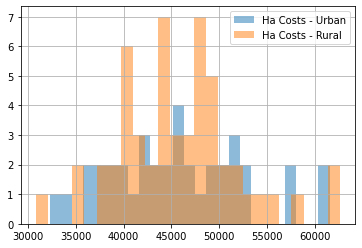

In [28]:
h = ha_costs_df_TN.analysis_value[ha_costs_df_TN.urban == 'Urban'].hist(alpha=0.5,bins=25,label='Ha Costs - Urban')
ha_costs_df_TN.analysis_value[ha_costs_df_TN.urban == 'Rural'].hist(alpha=0.5,bins=25,label='Ha Costs - Rural')
h.legend()

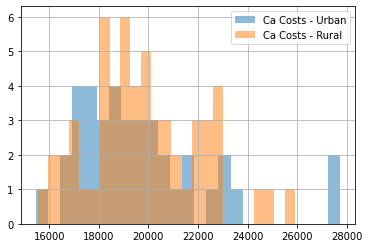

In [29]:
h = cancer_costs_df_TN.analysis_value[cancer_costs_df_TN.urban == 'Urban'].hist(alpha=0.5,bins=25,label='Ca Costs - Urban')
cancer_costs_df_TN.analysis_value[cancer_costs_df_TN.urban == 'Rural'].hist(alpha=0.5,bins=25,label='Ca Costs - Rural')
h.legend()

Create `income_dict`, a dictionary that uses the numerical codes in the income bucket column as keys and the matching descriptions as values.

In [30]:
income_dict = {1:'Under $1', 
               2:'Between 1 and $10,000',
               3:'Between 10,000 and $25,000',
               4:'Between 25,000 and $50,000',
               5:'Between 50,000 and $75,000',
               6:'Between 75,000 and $100,000', 
               7:'Between 100,000 and $200,000',
               8:'$200,000 or more'}
income_df_TN_red.income_bucket.value_counts()

8    96
7    96
6    96
5    96
4    96
3    96
2    96
1    96
Name: income_bucket, dtype: int64

Pass the dictionary as an argument to the pandas `replace()` method to change the `income_bucket` column so that it uses descriptive text instead of the numeric code.

In [31]:
income_df_TN_red.income_bucket = income_df_TN_red.income_bucket.replace(income_dict)

In [32]:
income_df_TN_red.income_bucket.value_counts()

$200,000 or more                96
Between 50,000 and $75,000      96
Between 100,000 and $200,000    96
Between 25,000 and $50,000      96
Between 75,000 and $100,000     96
Under $1                        96
Between 1 and $10,000           96
Between 10,000 and $25,000      96
Name: income_bucket, dtype: int64

Create a new dataframe `income_county_agg` to show totals for each county. Use the pandas `groupby()` method to group the data by county and get the `sum()` of all numeric columns for that county. Be sure to also `reset_index()` so that our aggregated data is re-indexed to begin at 0. Which county has the greatest number of returns? Does it also have the greatest total income?

In [33]:
income_count_agg = income_df_TN_red.groupby('county').sum()
income_count_agg = income_count_agg.reset_index()
income_count_agg.head(-1)

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Washington County,56270,25870,23050,6130,105820,30080,14540,3077401,56060,3129983,1150,3653
91,Wayne County,5730,2150,2720,810,11830,3690,1430,240866,5700,243850,290,987
92,Weakley County,12850,5440,5360,1800,25130,7820,3320,563374,12810,572176,600,1449
93,White County,11030,4430,4900,1510,22230,6900,2790,438258,10990,444471,360,770


Remove rows where county = "Tennessee"

In [34]:
income_count_agg_rmTN = income_count_agg[income_count_agg.county != 'Tennessee']
income_count_agg_rmTN = income_count_agg_rmTN.reset_index()

In [35]:
print('County with highest total income - ' + income_count_agg_rmTN.county[income_count_agg_rmTN.total_inc_amt.idxmax()])
print('County with highest return count - ' + income_count_agg_rmTN.county[income_count_agg_rmTN.return_count.idxmax()])

County with highest total income - Shelby County
County with highest return count - Shelby County


# Week 3
New Topics:

 * Creating calculated columns
 * Visual EDA: bar plots, histograms, box plots, swarm plots, scatterplots

Using the `tn_income` DataFrame, create a bar plot showing the total number of returns per income bucket for the state of Tennessee. You can get the total numbers for the state by filtering to rows where the `county` variable is "Tennessee".

In [36]:
income_df_TN_red.head(10)

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,Under $1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,"Between 1 and $10,000",439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,"Between 10,000 and $25,000",717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,"Between 25,000 and $50,000",759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,"Between 50,000 and $75,000",396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894
19757,TN,Tennessee,"Between 75,000 and $100,000",241730,43690,182110,12690,606940,183160,71640,20916820,241730,21167809,6350,21411
19758,TN,Tennessee,"Between 100,000 and $200,000",298270,33380,254300,8230,807590,255170,91150,39800165,298270,40397276,5490,20281
19759,TN,Tennessee,"$200,000 or more",97920,8640,85910,1760,281650,97810,31990,50066256,97920,51122320,560,2401
19760,TN,Anderson County,Under $1,390,220,140,0,570,60,210,-7663,240,-7465,0,0
19761,TN,Anderson County,"Between 1 and $10,000",5170,4010,500,610,5330,1260,950,27496,5170,28135,60,156


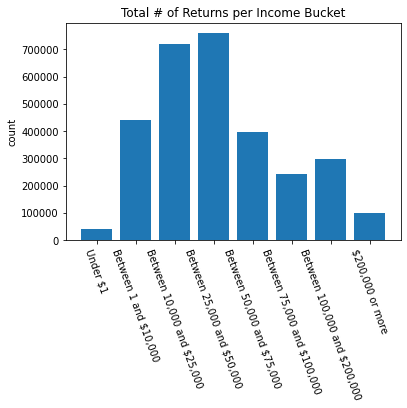

In [37]:
data = income_df_TN_red[income_df_TN_red.county == 'Tennessee']
plt.bar('income_bucket', 'return_count', data = data)
plt.xticks(rotation = 290)
plt.ylabel('count')
plt.title('Total # of Returns per Income Bucket');

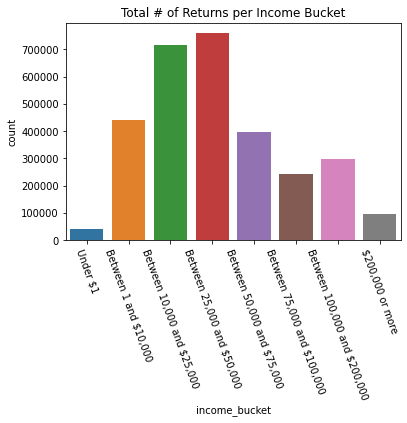

In [38]:
data = income_df_TN_red[income_df_TN_red.county == 'Tennessee']
sns.barplot(x = 'income_bucket', y = 'return_count', data = data)
plt.xticks(rotation = 290)
plt.ylabel('count')
plt.title('Total # of Returns per Income Bucket');

Create a calculated column in the `income_county_agg` DataFrame which gives the approximate average household income for each county. Calculate this as 1000*`total_inc_amt` / `return_count`.

In [39]:
income_count_agg['avg_household_inc'] = 1000 * income_count_agg.total_inc_amt/income_count_agg.return_count

Create a histogram showing the distribution of average incomes across all counties in Tennessee. Be sure to remove the Tennessee row prior to creating this histogram.


In [40]:
sns.__version__

'0.11.0'

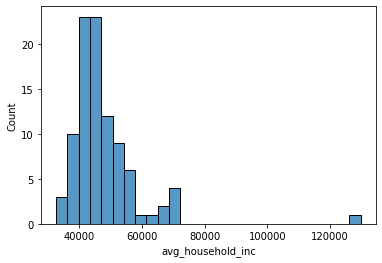

In [41]:
income_count_agg_rmTN = income_count_agg[income_count_agg.county != 'Tennessee']
sns.histplot(x='avg_household_inc',data=income_count_agg_rmTN);

For both `tn_cancer_costs` and `tn_ha_costs`, create boxplots and swarmplots comparing the distribution of analysis_value for urban counties vs. rural counties. What do you notice?


In [42]:
who

LogisticRegression	 cancer_costs_df	 cancer_costs_df_TN	 data	 gpd	 h	 ha_costs_df	 ha_costs_df_TN	 ha_costs_df_TN_rural	 
ha_costs_df_TN_urban	 income_count_agg	 income_count_agg_rmTN	 income_df	 income_df_TN	 income_df_TN_red	 income_dict	 keep_cols	 metrics	 
pd	 plot_confusion_matrix	 plt	 sns	 sp	 train_test_split	 warnings	 


Text(0.5, 1.0, 'Heart Attacks')

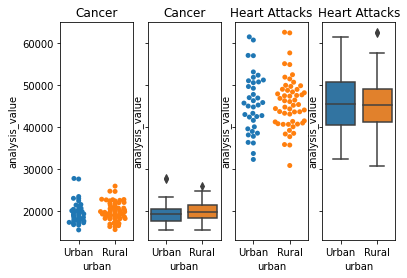

In [43]:
fig, axes = plt.subplots(1,4,sharey=True)
sns.swarmplot(x='urban',y='analysis_value',data=cancer_costs_df_TN,ax=axes[0])
axes[0].set_title('Cancer')
sns.boxplot(x='urban',y='analysis_value',data=cancer_costs_df_TN,ax=axes[1])
axes[1].set_title('Cancer')
sns.swarmplot(x='urban',y='analysis_value',data=ha_costs_df_TN,ax=axes[2])
axes[2].set_title('Heart Attacks')
sns.boxplot(x='urban',y='analysis_value',data=ha_costs_df_TN,ax=axes[3])
axes[3].set_title('Heart Attacks')

<AxesSubplot:xlabel='urban', ylabel='analysis_value'>

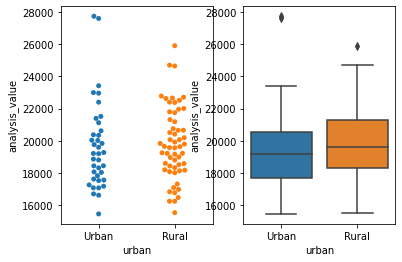

In [44]:
plt.subplot(121)
sns.swarmplot(x='urban',y='analysis_value',data=cancer_costs_df_TN)
plt.subplot(122)
sns.boxplot(x='urban',y='analysis_value',data=cancer_costs_df_TN)

In [45]:
sp.stats.ttest_ind(cancer_costs_df_TN.analysis_value[cancer_costs_df_TN.urban=='Urban'],
                          cancer_costs_df_TN.analysis_value[cancer_costs_df_TN.urban=='Rural'])

Ttest_indResult(statistic=-0.3878960036195451, pvalue=0.6989794275864107)

# Week 4

Revisit the plots you created last week and make any stylistic improvements that you think are necessary. Check fontsizes, colors, labels, etc.

In the `tn_ha_costs` DataFrame, rename the `analysis_value` column to `ha_avg_cost`. Similarly, in the `tn_cancer_costs` DataFrame, rename the `analysis_value` column to `cancer_avg_cost`.

In [46]:
ha_costs_df_TN.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2030,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,42749
2031,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,undefined,43661


In [47]:
ha_costs_df_TN = ha_costs_df_TN.rename(columns = {'analysis_value': 'ha_avg_cost'})
cancer_costs_df_TN = cancer_costs_df_TN.rename(columns = {'analysis_value': 'cancer_avg_cost'})

Create a new dataframe, `tn_df` by merging the `county`, `urban`, and `cancer_avg_cost` columns from `tn_cancer_costs` with the `county` and `ha_avg_cost` column from `tn_ha_costs`. Make sure that the resulting DataFrame contains just the counties that are in both `tn_cancer_costs` and `tn_ha_costs`.

In [48]:
#tn_df = tn_cancer_costs.loc[~tn_cancer_costs.county.isin()]
cancer_costs_df_TN_sub = cancer_costs_df_TN[['county', 'urban', 'cancer_avg_cost']]
ha_costs_df_TN_sub = ha_costs_df_TN[['county', 'ha_avg_cost']]

tn_df = pd.merge(cancer_costs_df_TN_sub, ha_costs_df_TN_sub, on = 'county', how = 'inner')
tn_df.head(3)

,county,urban,cancer_avg_cost,ha_avg_cost
0,Anderson County,Urban,15454,42749
1,Bedford County,Rural,19219,43661
2,Benton County,Rural,21315,44423


Create a scatterplot comparing the average cost of a heart attack to the average cost for cancer for each county. What do you notice?
  

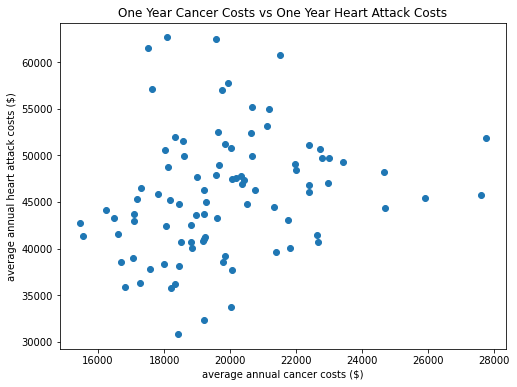

In [49]:
plt.figure(figsize = (8,6))
plt.scatter(tn_df.cancer_avg_cost, tn_df.ha_avg_cost, marker = 'o')
plt.title('One Year Cancer Costs vs One Year Heart Attack Costs')
plt.xlabel('average annual cancer costs ($)')
plt.ylabel('average annual heart attack costs ($)');

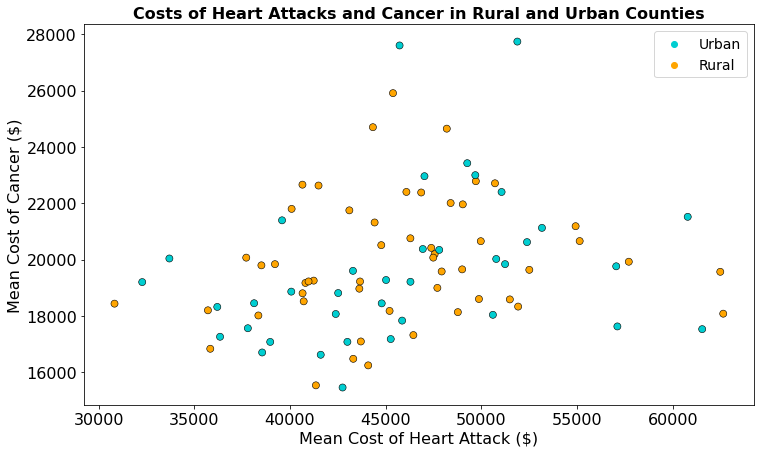

In [50]:
fontsize = 16
plt.figure(figsize = (12,7))
sns.scatterplot(data = tn_df, x = 'ha_avg_cost', y = 'cancer_avg_cost', s = 50,
                hue='urban',
                palette = ['darkturquoise', 'orange'],
                edgecolor = 'black')
plt.xticks(fontsize = fontsize)
plt.xlabel('Mean Cost of Heart Attack ($)', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('Mean Cost of Cancer ($)', fontsize = fontsize)
plt.title('Costs of Heart Attacks and Cancer in Rural and Urban Counties', fontsize = fontsize, fontweight = 'bold')
plt.legend(fontsize = fontsize - 2);

Merge the `avg_income` column from `income_county_agg` with `tn_df` and save the result back to `tn_df`. Create two new columns, `ha_cost_income_ratio` and `cancer_cost_income_ratio` by dividing `ha_avg_cost` and `cancer_avg_cost` respectively by `avg_income`.

In [51]:
income_count_agg.head(2)

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_household_inc
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53382.385535
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47127.581262


In [52]:
income_sub = income_count_agg[['county', 'avg_household_inc']]
tn_df = pd.merge(tn_df, income_sub, on = 'county', how = 'inner')
tn_df.head(2)

,county,urban,cancer_avg_cost,ha_avg_cost,avg_household_inc
0,Anderson County,Urban,15454,42749,53382.385535
1,Bedford County,Rural,19219,43661,47127.581262


In [53]:
tn_df['ha_cost_income_ratio'] = tn_df.ha_avg_cost / tn_df.avg_household_inc;
tn_df['cancer_cost_income_ratio'] = tn_df.cancer_avg_cost / tn_df.avg_household_inc;
tn_df.head(2)

,county,urban,cancer_avg_cost,ha_avg_cost,avg_household_inc,ha_cost_income_ratio,cancer_cost_income_ratio
0,Anderson County,Urban,15454,42749,53382.385535,0.800807,0.289496
1,Bedford County,Rural,19219,43661,47127.581262,0.926443,0.407808


In [54]:
counties = gpd.read_file('../data/county/tncounty.shp')
counties.head(2)

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ..."
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ..."


#### Before you can merge the `counties` GeoDataFrame with `tn_df` you need to drop the word `County` to get a match
 - one way to do this is using string slicing
 - remember to make sure the counties GeoDataFrame is on the left so that the result is a GeoDataFrame

In [55]:
tn_df['county2'] = tn_df.county.str[:-7]

In [56]:
geo_tn = pd.merge(counties, tn_df, left_on = 'NAME', right_on = 'county2')
geo_tn.head(2)

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,county,urban,cancer_avg_cost,ha_avg_cost,avg_household_inc,ha_cost_income_ratio,cancer_cost_income_ratio,county2
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",Chester County,Urban,23421,49264,43147.147147,1.141767,0.542817,Chester
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",Wayne County,Rural,22658,40652,42556.719023,0.955243,0.532419,Wayne


In [57]:
geo_tn[geo_tn.ha_cost_income_ratio.notnull()].shape

(91, 14)

In [58]:
tn_df_outer = pd.merge(left=cancer_costs_df_TN[['county','urban','cancer_avg_cost']], 
                     right=ha_costs_df_TN[['county','ha_avg_cost']], 
                     left_on='county', right_on='county', how='outer')
tn_df_outer = pd.merge(left=income_count_agg[['county','avg_household_inc']], 
                       right=tn_df_outer, left_on = 'county', right_on ='county', how = 'inner')
tn_df_outer

,county,avg_household_inc,urban,cancer_avg_cost,ha_avg_cost
0,Anderson County,53382.385535,Urban,15454,42749.0
1,Bedford County,47127.581262,Rural,19219,43661.0
2,Benton County,41296.671710,Rural,21315,44423.0
3,Bledsoe County,39743.640351,Rural,19250,41240.0
4,Blount County,56786.162888,Urban,17073,38968.0
...,...,...,...,...,...
90,Wayne County,42556.719023,Rural,22658,40652.0
91,Weakley County,44527.315175,Rural,20655,55139.0
92,White County,40296.554850,Rural,18515,40717.0
93,Williamson County,129768.971201,Urban,17527,61541.0


In [59]:
counties_sort = counties.sort_values(ascending=True, by='NAME')
counties_sort = counties_sort.reset_index()
counties_sort_merge = pd.merge(left=counties_sort, right=tn_df_outer, 
                               left_index=True, right_index=True )
counties_sort_merge.head(-1)

,index,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,county,avg_household_inc,urban,cancer_avg_cost,ha_avg_cost
0,28,33,Anderson,47001,9.610202e+09,605662.311840,"POLYGON ((2539671.281 623750.657, 2539541.603 ...",Anderson County,53382.385535,Urban,15454,42749.0
1,64,69,Bedford,47003,1.323640e+10,613112.247144,"POLYGON ((1811870.605 372240.939, 1811745.397 ...",Bedford County,47127.581262,Rural,19219,43661.0
2,22,27,Benton,47005,1.215877e+10,652794.558148,"POLYGON ((1393612.690 700920.921, 1393607.912 ...",Benton County,41296.671710,Rural,21315,44423.0
3,60,65,Bledsoe,47007,1.133810e+10,568748.389615,"POLYGON ((2225730.465 410416.106, 2225395.337 ...",Bledsoe County,39743.640351,Rural,19250,41240.0
4,49,54,Blount,47009,1.579660e+10,734481.262329,"POLYGON ((2621826.470 572956.498, 2622039.552 ...",Blount County,56786.162888,Urban,17073,38968.0
...,...,...,...,...,...,...,...,...,...,...,...,...
89,15,20,Washington,47179,9.191777e+09,503312.511590,"POLYGON ((3047291.648 718878.707, 3046879.306 ...",Washington County,55624.364670,Urban,17256,36346.0
90,1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",Wayne County,42556.719023,Rural,22658,40652.0
91,12,17,Weakley,47183,1.621965e+10,638695.923632,"POLYGON ((1138461.020 660955.689, 1138409.713 ...",Weakley County,44527.315175,Rural,20655,55139.0
92,59,64,White,47185,1.057562e+10,603735.685823,"MULTIPOLYGON (((2086270.674 532291.492, 208617...",White County,40296.554850,Rural,18515,40717.0


In [60]:
counties_sort_merge['ha_cost_income_ratio'] = counties_sort_merge.ha_avg_cost / counties_sort_merge.avg_household_inc;
counties_sort_merge['cancer_cost_income_ratio'] = counties_sort_merge.cancer_avg_cost / counties_sort_merge.avg_household_inc;
counties_sort_merge.head(-1)

,index,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,county,avg_household_inc,urban,cancer_avg_cost,ha_avg_cost,ha_cost_income_ratio,cancer_cost_income_ratio
0,28,33,Anderson,47001,9.610202e+09,605662.311840,"POLYGON ((2539671.281 623750.657, 2539541.603 ...",Anderson County,53382.385535,Urban,15454,42749.0,0.800807,0.289496
1,64,69,Bedford,47003,1.323640e+10,613112.247144,"POLYGON ((1811870.605 372240.939, 1811745.397 ...",Bedford County,47127.581262,Rural,19219,43661.0,0.926443,0.407808
2,22,27,Benton,47005,1.215877e+10,652794.558148,"POLYGON ((1393612.690 700920.921, 1393607.912 ...",Benton County,41296.671710,Rural,21315,44423.0,1.075704,0.516143
3,60,65,Bledsoe,47007,1.133810e+10,568748.389615,"POLYGON ((2225730.465 410416.106, 2225395.337 ...",Bledsoe County,39743.640351,Rural,19250,41240.0,1.037650,0.484354
4,49,54,Blount,47009,1.579660e+10,734481.262329,"POLYGON ((2621826.470 572956.498, 2622039.552 ...",Blount County,56786.162888,Urban,17073,38968.0,0.686224,0.300654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,15,20,Washington,47179,9.191777e+09,503312.511590,"POLYGON ((3047291.648 718878.707, 3046879.306 ...",Washington County,55624.364670,Urban,17256,36346.0,0.653419,0.310224
90,1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",Wayne County,42556.719023,Rural,22658,40652.0,0.955243,0.532419
91,12,17,Weakley,47183,1.621965e+10,638695.923632,"POLYGON ((1138461.020 660955.689, 1138409.713 ...",Weakley County,44527.315175,Rural,20655,55139.0,1.238319,0.463873
92,59,64,White,47185,1.057562e+10,603735.685823,"MULTIPOLYGON (((2086270.674 532291.492, 208617...",White County,40296.554850,Rural,18515,40717.0,1.010434,0.459469


Create two choropleths showing the cost income ratios you calculated in the previous part. What do you notice?

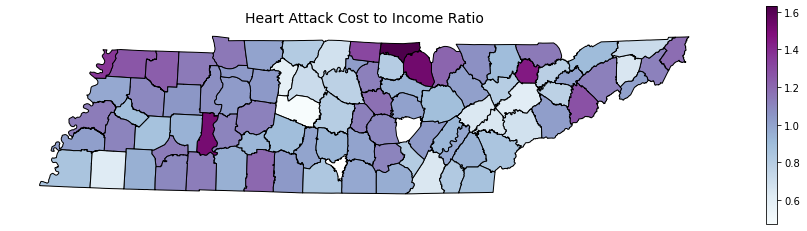

In [61]:
fig, ax = plt.subplots(figsize=(16,4))
geo_tn[geo_tn.ha_cost_income_ratio.notnull()].plot(column = 'ha_cost_income_ratio', 
              cmap = 'BuPu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Heart Attack Cost to Income Ratio', fontsize = 14)
ax.axis('off');

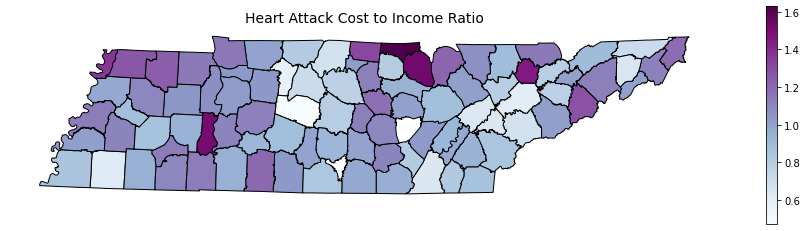

In [62]:
fig, ax = plt.subplots(figsize=(16,4))
counties_sort_merge[counties_sort_merge.ha_cost_income_ratio.notnull()].plot(column = 'ha_cost_income_ratio', 
              cmap = 'BuPu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Heart Attack Cost to Income Ratio', fontsize = 14)
ax.axis('off');

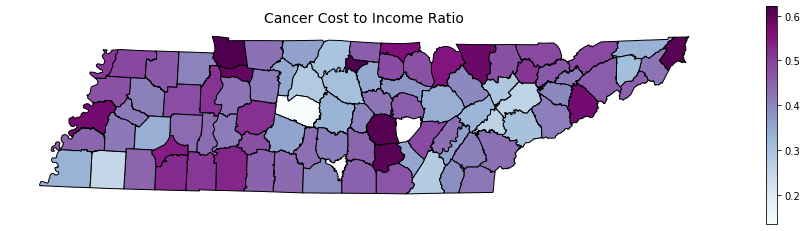

In [63]:
fig, ax = plt.subplots(figsize=(16,4))
geo_tn[geo_tn.cancer_cost_income_ratio.notnull()].plot(column = 'cancer_cost_income_ratio', 
              cmap = 'BuPu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Cancer Cost to Income Ratio', fontsize = 14)
ax.axis('off');

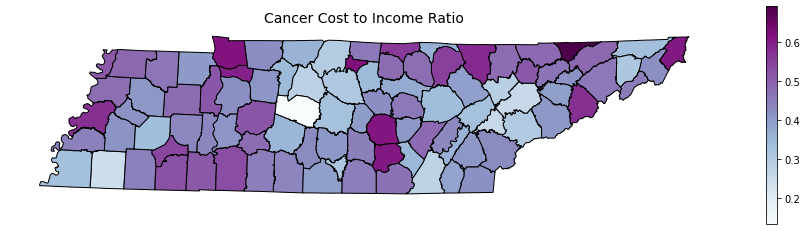

In [64]:
fig, ax = plt.subplots(figsize=(16,4))
counties_sort_merge[counties_sort_merge.cancer_cost_income_ratio.notnull()].plot(column = 'cancer_cost_income_ratio', 
              cmap = 'BuPu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Cancer Cost to Income Ratio', fontsize = 14)
ax.axis('off');

------------
# Week 5
Building a Classifier
- Overview of Machine Learning
- Feature Engineering
- One hot encoding to encode categorical variables for use in a model
- Creating training and test data


 - What does the exploratory data analysis suggest about our question?
 - Build a model that will predict whether the average cost for cancer care is above the average cost or equal to or below the average cost.
 - To train a model, we will want to get more that just the Tennessee data. Make a copy of your notebook and then remove the `TENNESSEE` filters for the cancer, heart attack, and income data. **Be sure to use state and county for any aggregations.** 
   - You can remove the cells for creating visualizations from this new notebook
   - You will need to use the `state_abbrev.csv` file, which lists state names and their 2-character abbreviations, to map the state names in the cancer and heart attack data to their abbreviations **prior** to merging with the income data. The code for mapping will look something like this:
```
state_abbrev=pd.read_csv('../data/state_abbrev.csv')
ha_costs['state']=ha_costs.state.map(state_abbrev.set_index('name')['abbrev'].to_dict())
```
   

- Create your target variable (whether cancer cost is above or below the mean)
- What are your preictors?
    - Use `pd.get_dummies()` with your explanatory variables to encode any categorical values. Features for your model must be numeric.
     - Split the data into train and test sets.
    - Build and evaluate a logistic regression model.
 - Think about other potential features that might explain cost disparities. Can you find additional data that may improve your model? The number of healthcare providers in a county, the number of healthcare facilities in a county, unemployment rates, or the per-person-income (which can be approximated using the number of exemptions in the IRS data) are potential features. Can you think of others?

## 1a. Load/clean the heart attack and cancer costs data

In [65]:
# 1a. Load/clean the heart attack and cancer costs data
state_abbr = pd.read_csv('../data/state_abbrev.csv')
ha_costs_df = pd.read_csv('../data/mmd_heart_attack_data.csv')
cancer_costs_df = pd.read_csv('../data/mmd_cancer_data.csv')

# Rename analysis_value column for cost data
ha_costs_df = ha_costs_df.rename(columns = {'analysis_value': 'ha_avg_cost'})
cancer_costs_df = cancer_costs_df.rename(columns = {'analysis_value': 'cancer_avg_cost'})

# Merge the two costs datasets
costs_df = pd.merge(left=cancer_costs_df[['state','county','urban','cancer_avg_cost']], 
                    right=ha_costs_df[['state','county','ha_avg_cost']], 
                    left_on=['state','county'], right_on=['state','county'], how='outer')

# Remove those rows which don't contain "County" in the name
costs_df = costs_df[costs_df['county'].str.contains('County')]

# Change state names to abbrevition (as it is in income data)
state_dict = state_abbr.set_index('name').T.to_dict('list')
costs_df.state = costs_df.state.replace(state_dict)  

## 1b. Load/clean the income data¶

In [66]:
# 1b. Load/clean the income data
# Read in income data and change some column names
income_df = pd.read_csv('../data/irs_county_2016.csv')
keep_cols = ['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']
income_df = income_df.loc[:,keep_cols]
income_df.columns = ['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']

# Aggregate income data by county
income_county_df = income_df.groupby(['state', 'county']).sum()
income_county_df = income_county_df.reset_index()

# Create new average income column
income_county_df['avg_inc'] = 1000 * income_county_df.total_inc_amt/income_county_df.return_count

# Create reduced version of income data
income_sub = income_county_df[['state','county', 'avg_inc','elderly','dependents','returns_with_unemployment']]

# Remove those rows which don't contain "County" in the name
income_sub = income_sub[income_sub['county'].str.contains('County')]
income_sub = income_sub.reset_index()
income_sub

,index,state,county,avg_inc,elderly,dependents,returns_with_unemployment
0,31,AL,Autauga County,55680.240764,5340,17390,430
1,32,AL,Baldwin County,62603.044838,29090,57200,1980
2,33,AL,Barbour County,40094.136808,2400,6970,260
3,34,AL,Bibb County,47260.201511,1670,6120,290
4,35,AL,Blount County,49333.197648,5350,16330,540
...,...,...,...,...,...,...,...
2987,3185,WY,Sweetwater County,67995.656617,4310,14380,1200
2988,3186,WY,Teton County,214588.045007,3120,7870,720
2989,3187,WY,Uinta County,60912.403101,2280,7260,520
2990,3188,WY,Washakie County,62248.501362,1220,2260,190


## 2. Merge the cost data with the income data based on state and county.

In [67]:
# Merge the cost data with the income data based on state and county.
costs_income_df = pd.merge(left=income_sub, 
                           right=costs_df, 
                           left_on = ['state','county'], 
                           right_on =['state','county'], how = 'inner')

## 3. Create cost/income ratio variables

In [68]:
costs_income_df['ha_cost_inc_ratio'] = costs_income_df.ha_avg_cost / costs_income_df.avg_inc;
costs_income_df['cancer_cost_inc_ratio'] = costs_income_df.cancer_avg_cost / costs_income_df.avg_inc;
costs_income_df.reindex()
costs_income_df.head(-1)


,index,state,county,avg_inc,elderly,dependents,returns_with_unemployment,urban,cancer_avg_cost,ha_avg_cost,ha_cost_inc_ratio,cancer_cost_inc_ratio
0,31,AL,Autauga County,55680.240764,5340,17390,430,Urban,19293,40470.0,0.726829,0.346496
1,32,AL,Baldwin County,62603.044838,29090,57200,1980,Rural,17151,36615.0,0.584876,0.273964
2,33,AL,Barbour County,40094.136808,2400,6970,260,Rural,19469,46509.0,1.159995,0.485582
3,34,AL,Bibb County,47260.201511,1670,6120,290,Urban,17234,42949.0,0.908777,0.364662
4,35,AL,Blount County,49333.197648,5350,16330,540,Urban,20317,50067.0,1.014874,0.411832
...,...,...,...,...,...,...,...,...,...,...,...,...
2958,3184,WY,Sublette County,72788.753056,1140,2650,230,Rural,22281,NaN,NaN,0.306105
2959,3185,WY,Sweetwater County,67995.656617,4310,14380,1200,Rural,23139,57980.0,0.852702,0.340301
2960,3186,WY,Teton County,214588.045007,3120,7870,720,Rural,14149,31371.0,0.146192,0.065936
2961,3187,WY,Uinta County,60912.403101,2280,7260,520,Rural,18194,73571.0,1.207816,0.298691


## 4. Set up model inputs.

In [69]:
# Drop the information about county and state
costs_inc_mdl = costs_income_df
costs_inc_mdl = costs_inc_mdl.drop(columns = ['index','county','state']) # 'state'
costs_inc_mdl = pd.get_dummies(costs_inc_mdl, columns = ['urban'], drop_first = True)

# Create the target variable, i.e. above or below the mean cost/income ratio
costs_inc_mdl['abv_avg_ca'] = costs_inc_mdl.cancer_cost_inc_ratio > costs_inc_mdl.cancer_cost_inc_ratio.mean()
costs_inc_mdl['abv_avg_ha'] = costs_inc_mdl.ha_cost_inc_ratio > costs_inc_mdl.ha_cost_inc_ratio.mean()

# Remove rows with NaN
costs_inc_mdl = costs_inc_mdl.dropna()
costs_inc_mdl

,avg_inc,elderly,dependents,returns_with_unemployment,cancer_avg_cost,ha_avg_cost,ha_cost_inc_ratio,cancer_cost_inc_ratio,urban_Urban,abv_avg_ca,abv_avg_ha
0,55680.240764,5340,17390,430,19293,40470.0,0.726829,0.346496,1,False,False
1,62603.044838,29090,57200,1980,17151,36615.0,0.584876,0.273964,0,False,False
2,40094.136808,2400,6970,260,19469,46509.0,1.159995,0.485582,0,True,True
3,47260.201511,1670,6120,290,17234,42949.0,0.908777,0.364662,1,False,False
4,49333.197648,5350,16330,540,20317,50067.0,1.014874,0.411832,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...
2957,68287.817938,4850,7410,770,19864,59314.0,0.868588,0.290886,0,False,False
2959,67995.656617,4310,14380,1200,23139,57980.0,0.852702,0.340301,0,False,False
2960,214588.045007,3120,7870,720,14149,31371.0,0.146192,0.065936,0,False,False
2961,60912.403101,2280,7260,520,18194,73571.0,1.207816,0.298691,0,False,True


## 5. Run model predicting cancer costs above or below average

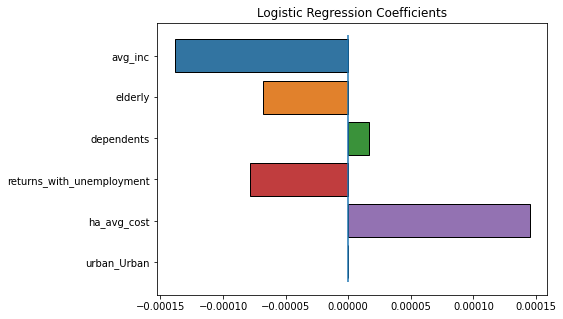

In [70]:
# Set the X (predictor) and y (target) variables
X = costs_inc_mdl.drop(columns = ['cancer_avg_cost','abv_avg_ha','abv_avg_ca',
                                  'ha_cost_inc_ratio','cancer_cost_inc_ratio']) #'avg_inc','ha_avg_cost'

y = costs_inc_mdl.abv_avg_ca

# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321)

# Train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Plot the resulting coefficients 
fig, ax = plt.subplots(figsize = (7,5))
sns.barplot(x = logistic_model.coef_[0], y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('Logistic Regression Coefficients')
ymin, ymax = plt.ylim()
plt.vlines(x = 0, ymin = ymin, ymax = ymax);


## 6. Analyze predicted probabilities

In [71]:
y_pred_prob = logistic_model.predict_proba(X_test)[:,1]

i = 100
print('County Information:\n{}'.format(X_test.iloc[i]))
print('---------------------------------')
print('Predicted Probability of Abv/Below Mean Cost/Income Ratio: {}'.format(y_pred_prob[i]))

County Information:
avg_inc                      39627.631579
elderly                       1230.000000
dependents                    5530.000000
returns_with_unemployment      240.000000
ha_avg_cost                  57703.000000
urban_Urban                      0.000000
Name: 132, dtype: float64
---------------------------------
Predicted Probability of Abv/Below Mean Cost/Income Ratio: 0.9459315950817199


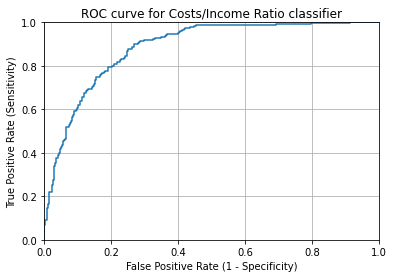

In [72]:
fp_rate, tp_rate, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fp_rate, tp_rate)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Costs/Income Ratio classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## 7. Analyze predictions

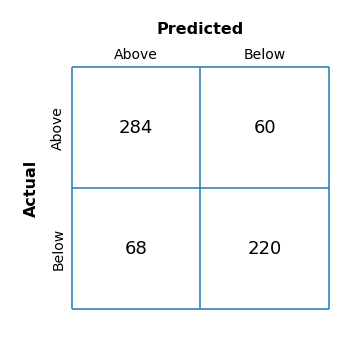

In [73]:
y_pred = logistic_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred, labels = ['Above', 'Below'])

overall accuracy:
0.7974683544303798


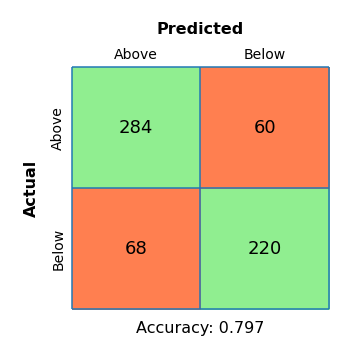

In [74]:
print('overall accuracy:')
print(metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, labels = ['Above', 'Below'], metric = 'accuracy')

sensitivity:
0.7638888888888888


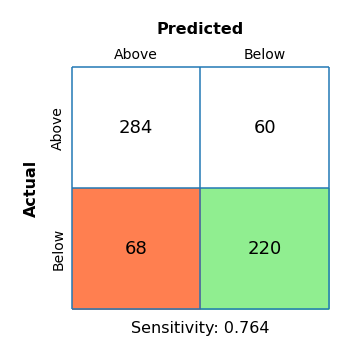

In [75]:
print('sensitivity:')
print(metrics.recall_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, labels = ['Above', 'Below'], metric = 'sensitivity')

precision:
0.7857142857142857


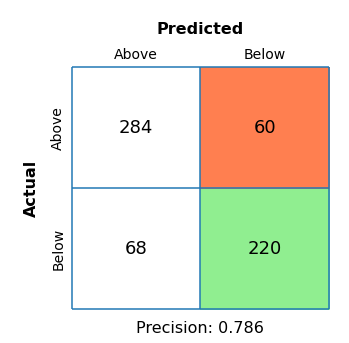

In [76]:
print('precision:')
print(metrics.precision_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, labels = ['Above', 'Below'], metric = 'precision')

## Week 6

## Use random forest classifier to predict healthcare cost burden for cancer and heart attacks (i.e. avg_cost/avg_income ratio)

## 1. Load and clean the original healthcare cost and income data

In [77]:
# 1a. Load/clean the heart attack and cancer costs data
state_abbr = pd.read_csv('../data/state_abbrev.csv')
ha_costs_df = pd.read_csv('../data/mmd_heart_attack_data.csv')
cancer_costs_df = pd.read_csv('../data/mmd_cancer_data.csv')

# Rename analysis_value column for cost data
ha_costs_df = ha_costs_df.rename(columns = {'analysis_value': 'ha_avg_cost'})
cancer_costs_df = cancer_costs_df.rename(columns = {'analysis_value': 'cancer_avg_cost'})

# Merge the two costs datasets
costs_df = pd.merge(left=cancer_costs_df[['state','county','urban','cancer_avg_cost']], 
                    right=ha_costs_df[['state','county','ha_avg_cost']], 
                    left_on=['state','county'], right_on=['state','county'], how='outer')

# Remove those rows which don't contain "County" in the name
costs_df = costs_df[costs_df['county'].str.contains('County')]

# Change state names to abbrevition (as it is in income data)
state_dict = state_abbr.set_index('name').T.to_dict('list')
costs_df.state = costs_df.state.replace(state_dict)  

# 1b. Load/clean the income data
# Read in income data and change some column names
income_df = pd.read_csv('../data/irs_county_2016.csv')
keep_cols = ['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']
income_df = income_df.loc[:,keep_cols]
income_df.columns = ['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']

# Aggregate income data by county
income_county_df = income_df.groupby(['state', 'county']).sum().reset_index()

# Create new average income column
income_county_df['avg_inc'] = 1000 * income_county_df.total_inc_amt/income_county_df.return_count

# Create reduced version of income data
income_sub = income_county_df[['state','county', 'avg_inc','elderly','dependents','returns_with_unemployment']]

# Remove those rows which don't contain "County" in the name
income_sub = income_sub[income_sub['county'].str.contains('County')].reset_index()
income_sub

,index,state,county,avg_inc,elderly,dependents,returns_with_unemployment
0,31,AL,Autauga County,55680.240764,5340,17390,430
1,32,AL,Baldwin County,62603.044838,29090,57200,1980
2,33,AL,Barbour County,40094.136808,2400,6970,260
3,34,AL,Bibb County,47260.201511,1670,6120,290
4,35,AL,Blount County,49333.197648,5350,16330,540
...,...,...,...,...,...,...,...
2987,3185,WY,Sweetwater County,67995.656617,4310,14380,1200
2988,3186,WY,Teton County,214588.045007,3120,7870,720
2989,3187,WY,Uinta County,60912.403101,2280,7260,520
2990,3188,WY,Washakie County,62248.501362,1220,2260,190


## 2. Load additional data from the County Health Rankings spreadsheets

### Sheet 1 - Outcomes & Factors Rankings

In [78]:
hranks = pd.read_excel('../data/2018 County Health Rankings Data - v2.xls', sheet_name = 1, header = [0,1])
# First, combine the two column name levels
col_names = [' '.join(col).strip() for col in hranks.columns.values]
# Then get rid of the "Unnamed" portion for the first 4 columns
col_names[0:4] = ['FIPS', 'State', 'County', '# of Ranked Counties']
hranks.columns = col_names
# Convert state column to abbreviation
hranks['State']=hranks.State.str.upper().map(state_abbr.set_index('name')['abbrev'].to_dict())

hranks.head(-1)

,FIPS,State,County,# of Ranked Counties,Health Outcomes Rank,Health Outcomes Quartile,Health Factors Rank,Health Factors Quartile
0,1001,AL,Autauga,67,11,1,8,1
1,1003,AL,Baldwin,67,3,1,3,1
2,1005,AL,Barbour,67,34,2,56,4
3,1007,AL,Bibb,67,41,3,37,3
4,1009,AL,Blount,67,14,1,19,2
...,...,...,...,...,...,...,...,...
3136,56035,WY,Sublette,23,2,1,7,2
3137,56037,WY,Sweetwater,23,15,3,21,4
3138,56039,WY,Teton,23,1,1,1,1
3139,56041,WY,Uinta,23,21,4,17,3


### Sheet 2 - Outcomes & Factors SubRankings

In [79]:
hranks2 = pd.read_excel('../data/2018 County Health Rankings Data - v2.xls', sheet_name = 2, header = [0,1])
# First, combine the two column name levels
col_names = [' '.join(col).strip() for col in hranks2.columns.values]
# Then get rid of the "Unnamed" portion for the first 4 columns
col_names[0:4] = ['FIPS', 'State', 'County', '# of Ranked Counties']
hranks2.columns = col_names
# Convert state column to abbreviation
hranks2['State']=hranks2.State.str.upper().map(state_abbr.set_index('name')['abbrev'].to_dict())

hranks2.head(-1)

,FIPS,State,County,# of Ranked Counties,Length of Life Rank,Length of Life Quartile,Quality of Life Rank,Quality of Life Quartile,Health Behaviors Rank,Health Behaviors Quartile,Clinical Care Rank,Clinical Care Quartile,Social & Economic Factors Rank,Social & Economic Factors Quartile,Physical Environment Rank,Physical Environment Quartile
0,1001,AL,Autauga,67,18,2,5,1,12,1,15,1,3,1,51,4
1,1003,AL,Baldwin,67,4,1,4,1,3,1,7,1,8,1,14,1
2,1005,AL,Barbour,67,14,1,49,3,57,4,20,2,58,4,16,1
3,1007,AL,Bibb,67,53,4,25,2,39,3,42,3,42,3,29,2
4,1009,AL,Blount,67,17,1,12,1,11,1,41,3,13,1,54,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,56035,WY,Sublette,23,2,1,4,1,5,1,9,2,8,2,17,3
3137,56037,WY,Sweetwater,23,6,1,18,4,20,4,11,2,20,4,19,4
3138,56039,WY,Teton,23,1,1,2,1,1,1,1,1,1,1,15,3
3139,56041,WY,Uinta,23,18,4,21,4,19,4,6,1,17,3,13,3


### Sheet 3 - Ranked Measure Data

In [80]:
hranks3 = pd.read_excel('../data/2018 County Health Rankings Data - v2.xls', sheet_name = 3, header = [0,1])
# First, combine the two column name levels
col_names = [' '.join(col).strip() for col in hranks3.columns.values]
# Then get rid of the "Unnamed" portion for the first 3 columns
col_names[0:3] = ['FIPS', 'State', 'County']
hranks3.columns = col_names
# Convert state column to abbreviation
hranks3['State']=hranks3.State.str.upper().map(state_abbr.set_index('name')['abbrev'].to_dict())

hranks3.head(-1)

,FIPS,State,County,Premature death Years of Potential Life Lost Rate,Premature death 95% CI - Low,Premature death 95% CI - High,Premature death Quartile,Premature death Years of Potential Life Lost Rate (Black),Premature death Years of Potential Life Lost Rate (Hispanic),Premature death Years of Potential Life Lost Rate (White),...,Driving alone to work 95% CI - High,Driving alone to work Quartile,Driving alone to work % Drive Alone (Black),Driving alone to work % Drive Alone (Hispanic),Driving alone to work % Drive Alone (White),Long commute - driving alone # Workers who Drive Alone,Long commute - driving alone % Long Commute - Drives Alone,Long commute - driving alone 95% CI - Low,Long commute - driving alone 95% CI - High,Long commute - driving alone Quartile
0,1001.0,AL,Autauga,9409.294766,8492.111635,10326.477898,2,11806.223285,NaN,9148.381743,...,88.431482,4,82.494851,NaN,82.539683,21082.0,40.8,36.698437,44.901563,3
1,1003.0,AL,Baldwin,7467.596664,7025.900408,7909.292920,1,10335.702691,2827.348216,7484.117065,...,86.017804,2,85.567010,68.864800,84.646255,73058.0,40.1,37.614952,42.585048,3
2,1005.0,AL,Barbour,8929.474982,7633.929691,10225.020273,1,9141.333085,NaN,8896.000532,...,85.796041,1,80.341227,NaN,85.656228,7271.0,35.1,29.740946,40.459054,2
3,1007.0,AL,Bibb,11741.938889,10057.801626,13426.076153,4,11297.166352,NaN,11923.067966,...,89.905820,2,NaN,NaN,NaN,7044.0,48.8,40.894758,56.705242,4
4,1009.0,AL,Blount,9359.122343,8463.490290,10254.754396,1,NaN,5133.144570,9600.725685,...,87.622499,3,NaN,79.539642,81.580997,18384.0,60.2,55.818947,64.581053,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037.0,WY,Sweetwater,6682.397752,5848.326360,7516.469144,1,NaN,4249.103214,7169.977818,...,80.387201,3,NaN,71.180453,76.392270,17537.0,18.5,15.801336,21.198664,2
3138,56039.0,WY,Teton,3823.238218,2806.927407,4839.549029,1,NaN,NaN,NaN,...,68.571890,1,NaN,57.172131,65.065532,8984.0,11.5,7.798704,15.201296,1
3139,56041.0,WY,Uinta,8365.629795,6952.016456,9779.243135,4,NaN,NaN,NaN,...,78.929607,2,NaN,NaN,NaN,7049.0,17.6,12.927295,22.272705,2
3140,56043.0,WY,Washakie,6341.903776,5093.069491,7804.258313,1,NaN,NaN,NaN,...,81.564196,3,NaN,NaN,NaN,2783.0,9.7,5.480714,13.919286,1


### Sheet 5 - Additional Measure Data

In [81]:
hranks5 = pd.read_excel('../data/2018 County Health Rankings Data - v2.xls', sheet_name = 5, header = [0,1])
# First, combine the two column name levels
col_names = [' '.join(col).strip() for col in hranks5.columns.values]
# Then get rid of the "Unnamed" portion for the first 3 columns
col_names[0:3] = ['FIPS', 'State', 'County']
hranks5.columns = col_names
# Convert state column to abbreviation
hranks5['State']=hranks5.State.str.upper().map(state_abbr.set_index('name')['abbrev'].to_dict())

hranks5.head(-1)

,FIPS,State,County,Premature age-adjusted mortality # Deaths,Premature age-adjusted mortality Age-Adjusted Mortality,Premature age-adjusted mortality 95% CI - Low,Premature age-adjusted mortality 95% CI - High,Premature age-adjusted mortality Age-Adjusted Mortality (Black),Premature age-adjusted mortality Age-Adjusted Mortality (Hispanic),Premature age-adjusted mortality Age-Adjusted Mortality (White),...,Demographics % Hispanic,Demographics # Non-Hispanic White,Demographics % Non-Hispanic White,Demographics # Not Proficient in English,Demographics % Not Proficient in English,Demographics 95% CI - Low,Demographics 95% CI - High,Demographics % Female,Demographics # Rural,Demographics % Rural
0,1001,AL,Autauga,827.0,449.6,418.5,480.7,531.7,NaN,444.9,...,2.688754,41562,75.000000,432,0.832739,0.457689,1.207789,51.288437,22921.0,42.002162
1,1003,AL,Baldwin,2753.0,351.3,337.5,365.1,517.8,111.1,349.3,...,4.416411,173529,83.202198,1540,0.818809,0.508623,1.128996,51.457833,77060.0,42.279099
2,1005,AL,Barbour,418.0,433.6,390.5,476.6,477.0,NaN,394.7,...,4.213364,12061,46.450992,382,1.519370,0.790980,2.247760,46.932409,18613.0,67.789635
3,1007,AL,Bibb,408.0,529.1,476.7,581.4,630.4,NaN,526.6,...,2.499669,16850,74.415934,96,0.448137,0.000000,1.041411,46.363114,15663.0,68.352607
4,1009,AL,Blount,996.0,480.2,449.2,511.2,NaN,NaN,NaN,...,9.068695,50472,87.467073,1018,1.878506,1.332987,2.424025,50.613476,51562.0,89.951502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,56035,WY,Sublette,73.0,219.1,170.5,277.3,NaN,NaN,NaN,...,8.086805,8602,88.054049,58,0.619460,0.000000,1.737041,46.565667,10247.0,100.000000
3137,56037,WY,Sweetwater,480.0,356.5,323.9,389.0,NaN,262.4,376.8,...,16.076078,35152,79.592437,890,2.140040,1.512748,2.767333,48.178422,4782.0,10.916313
3138,56039,WY,Teton,124.0,154.2,126.2,182.2,NaN,NaN,NaN,...,15.122246,18896,81.479884,776,3.622952,2.101954,5.143949,48.402397,9887.0,46.430920
3139,56041,WY,Uinta,259.0,396.8,347.1,446.5,NaN,NaN,NaN,...,9.016512,18182,87.527078,257,1.329196,0.240454,2.417937,49.429548,9101.0,43.095937


## 3. Merge the cost, income, and health rankings data based on state and county.

In [82]:
# Merge costs and income data
cost_income_rank_df = pd.merge(left=income_sub, 
                               right=costs_df, 
                               left_on = ['state','county'], 
                               right_on =['state','county'], how = 'inner')

# Remove "County" from county names
cost_income_rank_df.county = cost_income_rank_df['county'].str.replace(' County', '', regex=True)
# Make state and county column names start with uppercase
cost_income_rank_df.rename(columns={'state':'State'}, inplace=True)
cost_income_rank_df.rename(columns={'county':'County'}, inplace=True)

# Merge rank data
cost_income_rank_df = pd.merge(left=cost_income_rank_df, 
                               right=hranks, 
                               left_on = ['State','County'], 
                               right_on =['State','County'], how = 'inner')
cost_income_rank_df = pd.merge(left=cost_income_rank_df, 
                               right=hranks2, 
                               left_on = ['State','County'], 
                               right_on =['State','County'], how = 'inner')
cost_income_rank_df = pd.merge(left=cost_income_rank_df, 
                               right=hranks3, 
                               left_on = ['State','County'], 
                               right_on =['State','County'], how = 'inner')
cost_income_rank_df = pd.merge(left=cost_income_rank_df, 
                               right=hranks5, 
                               left_on = ['State','County'], 
                               right_on =['State','County'], how = 'inner')


# Create the cost to income ratios
cost_income_rank_df['ha_cost_inc_ratio'] = cost_income_rank_df.ha_avg_cost / cost_income_rank_df.avg_inc;
cost_income_rank_df['cancer_cost_inc_ratio'] = cost_income_rank_df.cancer_avg_cost / cost_income_rank_df.avg_inc;
cost_income_rank_df.reindex()
cost_income_rank_df.head(-1)

,index,State,County,avg_inc,elderly,dependents,returns_with_unemployment,urban,cancer_avg_cost,ha_avg_cost,...,Demographics % Non-Hispanic White,Demographics # Not Proficient in English,Demographics % Not Proficient in English,Demographics 95% CI - Low,Demographics 95% CI - High,Demographics % Female,Demographics # Rural,Demographics % Rural,ha_cost_inc_ratio,cancer_cost_inc_ratio
0,31,AL,Autauga,55680.240764,5340,17390,430,Urban,19293,40470.0,...,75.000000,432,0.832739,0.457689,1.207789,51.288437,22921.0,42.002162,0.726829,0.346496
1,32,AL,Baldwin,62603.044838,29090,57200,1980,Rural,17151,36615.0,...,83.202198,1540,0.818809,0.508623,1.128996,51.457833,77060.0,42.279099,0.584876,0.273964
2,33,AL,Barbour,40094.136808,2400,6970,260,Rural,19469,46509.0,...,46.450992,382,1.519370,0.790980,2.247760,46.932409,18613.0,67.789635,1.159995,0.485582
3,34,AL,Bibb,47260.201511,1670,6120,290,Urban,17234,42949.0,...,74.415934,96,0.448137,0.000000,1.041411,46.363114,15663.0,68.352607,0.908777,0.364662
4,35,AL,Blount,49333.197648,5350,16330,540,Urban,20317,50067.0,...,87.467073,1018,1.878506,1.332987,2.424025,50.613476,51562.0,89.951502,1.014874,0.411832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,3184,WY,Sublette,72788.753056,1140,2650,230,Rural,22281,NaN,...,88.054049,58,0.619460,0.000000,1.737041,46.565667,10247.0,100.000000,NaN,0.306105
2959,3185,WY,Sweetwater,67995.656617,4310,14380,1200,Rural,23139,57980.0,...,79.592437,890,2.140040,1.512748,2.767333,48.178422,4782.0,10.916313,0.852702,0.340301
2960,3186,WY,Teton,214588.045007,3120,7870,720,Rural,14149,31371.0,...,81.479884,776,3.622952,2.101954,5.143949,48.402397,9887.0,46.430920,0.146192,0.065936
2961,3187,WY,Uinta,60912.403101,2280,7260,520,Rural,18194,73571.0,...,87.527078,257,1.329196,0.240454,2.417937,49.429548,9101.0,43.095937,1.207816,0.298691


In [83]:
cost_income_rank_df

,index,State,County,avg_inc,elderly,dependents,returns_with_unemployment,urban,cancer_avg_cost,ha_avg_cost,...,Demographics % Non-Hispanic White,Demographics # Not Proficient in English,Demographics % Not Proficient in English,Demographics 95% CI - Low,Demographics 95% CI - High,Demographics % Female,Demographics # Rural,Demographics % Rural,ha_cost_inc_ratio,cancer_cost_inc_ratio
0,31,AL,Autauga,55680.240764,5340,17390,430,Urban,19293,40470.0,...,75.000000,432,0.832739,0.457689,1.207789,51.288437,22921.0,42.002162,0.726829,0.346496
1,32,AL,Baldwin,62603.044838,29090,57200,1980,Rural,17151,36615.0,...,83.202198,1540,0.818809,0.508623,1.128996,51.457833,77060.0,42.279099,0.584876,0.273964
2,33,AL,Barbour,40094.136808,2400,6970,260,Rural,19469,46509.0,...,46.450992,382,1.519370,0.790980,2.247760,46.932409,18613.0,67.789635,1.159995,0.485582
3,34,AL,Bibb,47260.201511,1670,6120,290,Urban,17234,42949.0,...,74.415934,96,0.448137,0.000000,1.041411,46.363114,15663.0,68.352607,0.908777,0.364662
4,35,AL,Blount,49333.197648,5350,16330,540,Urban,20317,50067.0,...,87.467073,1018,1.878506,1.332987,2.424025,50.613476,51562.0,89.951502,1.014874,0.411832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,3185,WY,Sweetwater,67995.656617,4310,14380,1200,Rural,23139,57980.0,...,79.592437,890,2.140040,1.512748,2.767333,48.178422,4782.0,10.916313,0.852702,0.340301
2960,3186,WY,Teton,214588.045007,3120,7870,720,Rural,14149,31371.0,...,81.479884,776,3.622952,2.101954,5.143949,48.402397,9887.0,46.430920,0.146192,0.065936
2961,3187,WY,Uinta,60912.403101,2280,7260,520,Rural,18194,73571.0,...,87.527078,257,1.329196,0.240454,2.417937,49.429548,9101.0,43.095937,1.207816,0.298691
2962,3188,WY,Washakie,62248.501362,1220,2260,190,Rural,23660,75675.0,...,82.610808,52,0.659647,0.000000,1.662583,49.678203,3068.0,35.954529,1.215692,0.380089


## 4. Set up model inputs

In [84]:
# Change max number of rows shown by pandas
# pd.set_option('display.max_rows', 300)

# Drop the information about county and state
costs_inc_mdl = cost_income_rank_df
costs_inc_mdl = costs_inc_mdl.drop(columns = ['index','State','County']) # 'state'
costs_inc_mdl = pd.get_dummies(costs_inc_mdl, columns = ['urban'], drop_first = True)

# Create the target variable, i.e. above or below the mean cost/income ratio
costs_inc_mdl['abv_avg_ca'] = costs_inc_mdl.cancer_cost_inc_ratio > costs_inc_mdl.cancer_cost_inc_ratio.mean()
costs_inc_mdl['abv_avg_ha'] = costs_inc_mdl.ha_cost_inc_ratio > costs_inc_mdl.ha_cost_inc_ratio.mean()

# Remove rows with NaN, must include 80% of counties usable
#costs_inc_mdl = costs_inc_mdl.dropna()
limitPer = len(costs_inc_mdl) * .80
costs_inc_mdl = costs_inc_mdl.dropna(thresh=limitPer,axis=1)
costs_inc_mdl = costs_inc_mdl.dropna()
costs_inc_mdl = costs_inc_mdl.select_dtypes(include=['float32','int32','int64','float64','bool'])
costs_inc_mdl
#pd.to_numeric(df['column'], errors='coerce').notnull().all()



,avg_inc,elderly,dependents,returns_with_unemployment,cancer_avg_cost,ha_avg_cost,FIPS_x,# of Ranked Counties_x,FIPS_y,# of Ranked Counties_y,...,Demographics % Not Proficient in English,Demographics 95% CI - Low,Demographics 95% CI - High,Demographics % Female,Demographics # Rural,Demographics % Rural,ha_cost_inc_ratio,cancer_cost_inc_ratio,abv_avg_ca,abv_avg_ha
0,55680.240764,5340,17390,430,19293,40470.0,1001,67,1001,67,...,0.832739,0.457689,1.207789,51.288437,22921.0,42.002162,0.726829,0.346496,False,False
1,62603.044838,29090,57200,1980,17151,36615.0,1003,67,1003,67,...,0.818809,0.508623,1.128996,51.457833,77060.0,42.279099,0.584876,0.273964,False,False
2,40094.136808,2400,6970,260,19469,46509.0,1005,67,1005,67,...,1.519370,0.790980,2.247760,46.932409,18613.0,67.789635,1.159995,0.485582,True,True
3,47260.201511,1670,6120,290,17234,42949.0,1007,67,1007,67,...,0.448137,0.000000,1.041411,46.363114,15663.0,68.352607,0.908777,0.364662,False,False
4,49333.197648,5350,16330,540,20317,50067.0,1009,67,1009,67,...,1.878506,1.332987,2.424025,50.613476,51562.0,89.951502,1.014874,0.411832,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,67220.108696,5080,7140,760,19707,64836.0,56029,23,56029,23,...,0.524743,0.012667,1.036820,50.199298,12478.0,44.240383,0.964533,0.293171,False,False
2956,52024.401914,1480,2100,190,23937,47718.0,56031,23,56031,23,...,0.730016,0.000000,1.913595,49.009217,5083.0,58.647744,0.917223,0.460111,True,False
2957,68287.817938,4850,7410,770,19864,59314.0,56033,23,56033,23,...,0.343181,0.000000,0.817466,49.731788,10330.0,35.478775,0.868588,0.290886,False,False
2959,67995.656617,4310,14380,1200,23139,57980.0,56037,23,56037,23,...,2.140040,1.512748,2.767333,48.178422,4782.0,10.916313,0.852702,0.340301,False,False


## 5. Build/Train the model

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#import graphviz
from IPython.display import SVG

### Build

In [86]:
# Set the X (predictor) and y (target) variables
X = costs_inc_mdl.drop(columns = ['avg_inc','cancer_avg_cost','abv_avg_ha','abv_avg_ca',
                                  'ha_cost_inc_ratio','cancer_cost_inc_ratio']) #'avg_inc','ha_avg_cost'

y = costs_inc_mdl.abv_avg_ca

# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321)

### Train/Test random forest model with default settings

In [91]:
# Train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Train the random forest model
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

# Plot the resulting coefficients 
#fig, ax = plt.subplots(figsize = (7,5))
#sns.barplot(x = forest.coef_[0], y = list(X.columns), ax = ax, edgecolor = 'black')
#plt.title('Logistic Regression Coefficients')
#ymin, ymax = plt.ylim()
#plt.vlines(x = 0, ymin = ymin, ymax = ymax);

y_pred_train = forest.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))
y_pred = forest.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

1.0
0.8135593220338984


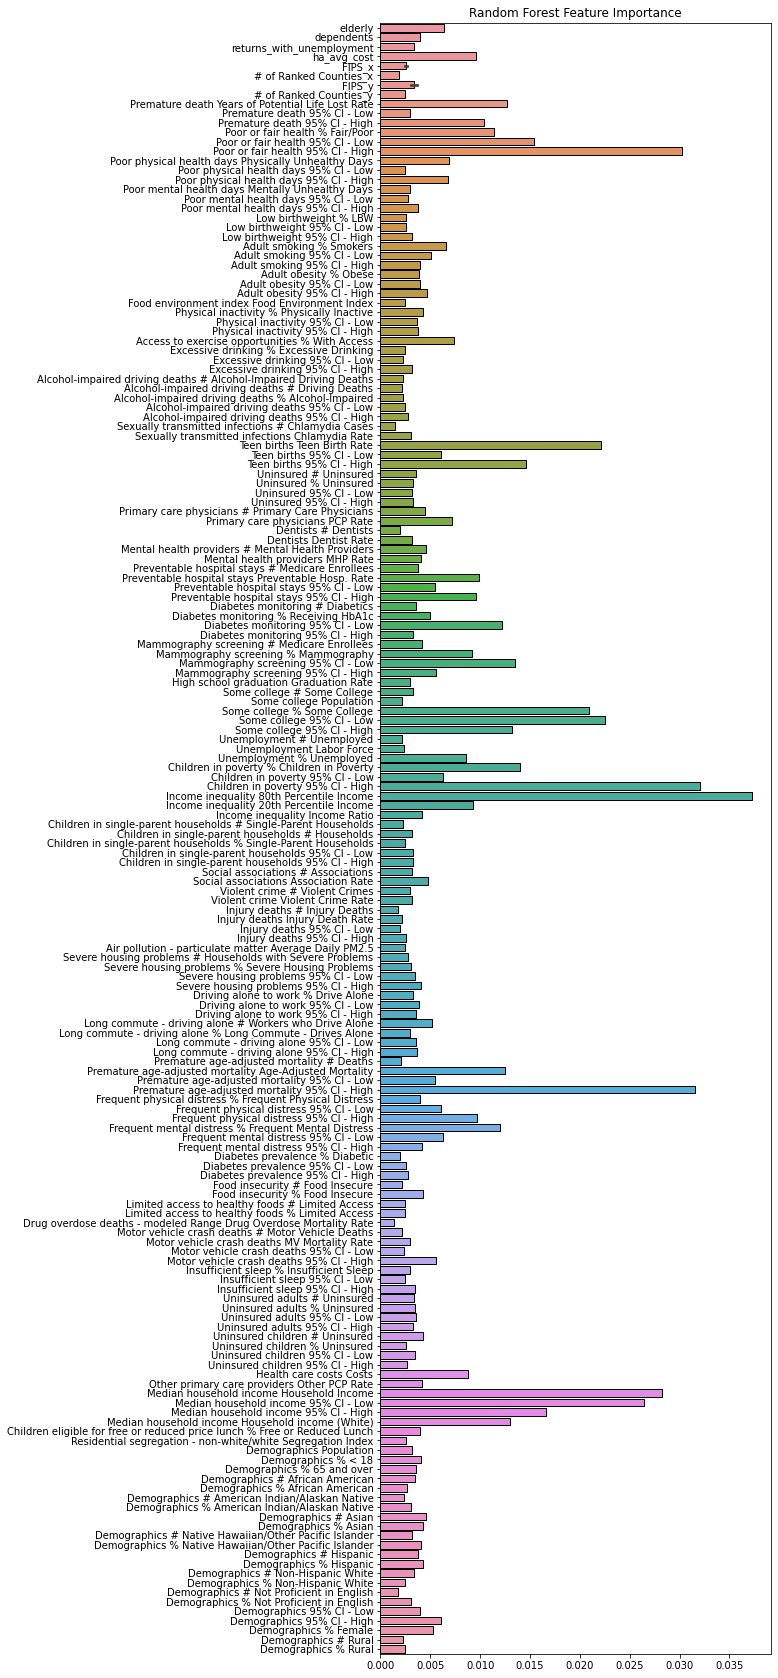

In [92]:
fig, ax = plt.subplots(figsize = (7,30))
sns.barplot(x = forest.feature_importances_, y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('Random Forest Feature Importance');

### Random Forest with adjusted settings

In [93]:
forest = RandomForestClassifier(n_estimators = 1000, max_depth = 7, min_samples_leaf = 10)
forest.fit(X_train, y_train)
y_pred_train = forest.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))
y_pred = forest.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9103107344632768
0.8008474576271186


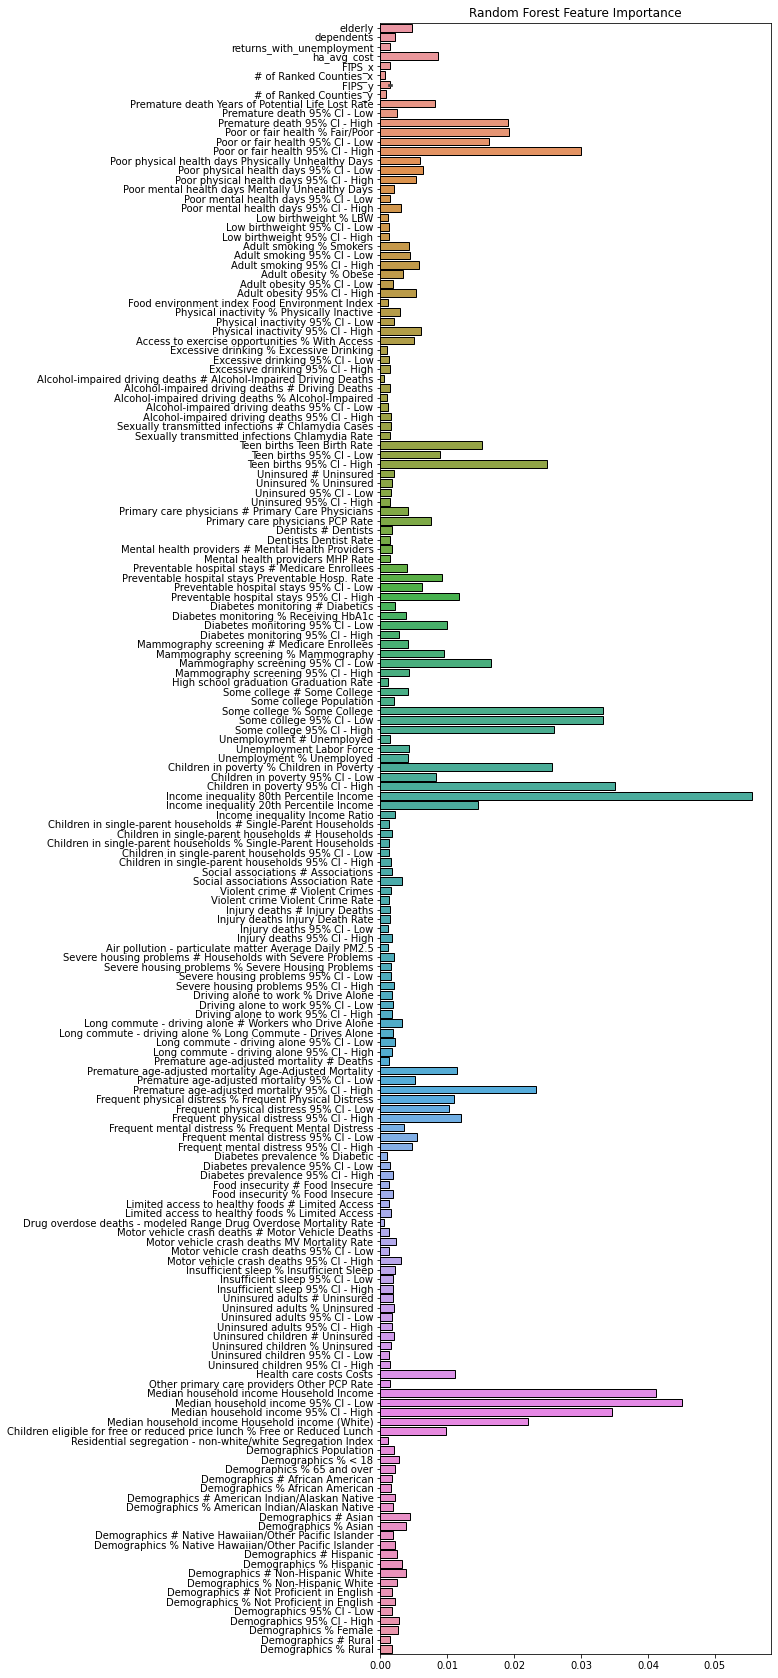

In [94]:
fig, ax = plt.subplots(figsize = (7,30))
sns.barplot(x = forest.feature_importances_, y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('Random Forest Feature Importance');